<a href="https://colab.research.google.com/github/saurav714/Machine-Learning-Lab-/blob/main/Sentinal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy


In [ ]:
import tweepy

# Twitter API credentials
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Collect tweets
tweets = api.search(q="your_keyword", lang="en", count=100)
tweet_texts = [tweet.text for tweet in tweets]


AttributeError: 'API' object has no attribute 'search'

In [ ]:
import tweepy

# Twitter API credentials
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Correct method for searching tweets
tweets = api.search_tweets(q="your_keyword", lang="en", count=100)
tweet_texts = [tweet.text for tweet in tweets]

# Print the collected tweets
for tweet in tweet_texts:
    print(tweet)


Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [ ]:
import pandas as pd

# Load the dataset (example with a CSV file)
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv')

# Display the first few rows
print(dataset.head())


FileNotFoundError: [Errno 2] No such file or directory: 'training.1600000.processed.noemoticon.csv'

In [ ]:
ls

sample_data/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin1')
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
print(df.iloc[0]['target'])
print(df.iloc[0]['text'])

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files from your local system


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Adjust the path to your specific folder and file name
df = pd.read_csv('/content/drive/My Drive/datasets/training.1600000.processed.noemoticon.csv', encoding='latin1')

# Display the first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/datasets/training.1600000.processed.noemoticon.csv'

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Copy the file from Google Drive to your current working directory
file_id = '16qDhz3hhcKu3CQifZnupbiRniWyz6tou'
destination = '/content/drive/My Drive/your_file_name'  # Change this to your desired file name or path

# Use gdown to download the file
import gdown

# This will download the file from Google Drive to your current working directory
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From (original): https://drive.google.com/uc?id=16qDhz3hhcKu3CQifZnupbiRniWyz6tou
From (redirected): https://drive.google.com/uc?id=16qDhz3hhcKu3CQifZnupbiRniWyz6tou&confirm=t&uuid=12be97b8-90c2-41f2-981e-b105450f22bc
To: /content/drive/My Drive/your_file_name
100%|██████████| 239M/239M [00:03<00:00, 71.9MB/s]


'/content/drive/My Drive/your_file_name'

In [ ]:
import pandas as pd

# Load the file into a dataframe (assuming it's a CSV)
df = pd.read_csv(destination, encoding='latin1')
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Display the first few rows
print(df.head())


   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing: Keep relevant columns and map sentiments
df = df[['target', 'text']]  # Only keep the 'target' and 'text' columns
df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map target labels to text

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert text data into numerical form using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict the sentiment on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model's performance
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


<ipython-input-5-6365420b6429>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map target labels to text


Accuracy: 0.779825
              precision    recall  f1-score   support

    negative       0.79      0.76      0.78    159494
    positive       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Download file from Google Drive using the provided link
file_id = '16qDhz3hhcKu3CQifZnupbiRniWyz6tou'
destination = '/content/drive/My Drive/sentiment_data.csv'  # Modify this as needed
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

df = df[['target', 'text']]  # Adjust these to your dataset's column names
df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map target labels


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Convert text data into numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict the sentiment on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Visualization 1: Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Sentiment Distribution (Positive, Neutral, Negative)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization 3: ROC Curve (for each class)
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Get predicted probabilities
y_pred_prob = model.predict_proba(X_test_vec)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):  # 3 classes (positive, neutral, negative)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From (original): https://drive.google.com/uc?id=16qDhz3hhcKu3CQifZnupbiRniWyz6tou
From (redirected): https://drive.google.com/uc?id=16qDhz3hhcKu3CQifZnupbiRniWyz6tou&confirm=t&uuid=5fae128f-c506-42d9-91ba-4475efda10a0
To: /content/drive/My Drive/sentiment_data.csv
100%|██████████| 239M/239M [00:01<00:00, 160MB/s]


KeyError: "None of [Index(['target', 'text'], dtype='object')] are in the [columns]"

In [ ]:
df = df[['target', 'text']]  # Adjust these to your dataset's column names
df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map target labels


KeyError: "None of [Index(['target', 'text'], dtype='object')] are in the [columns]"

In [ ]:
# Load the dataset again
df = pd.read_csv(destination, encoding='latin1')

# Check the columns of the dataset
print(df.columns)

# Display the first few rows to better understand the structure
print(df.head())


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...      

In [ ]:
df = df[['target', 'text']]  # Adjust these to your dataset's column names
df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map target labels


KeyError: "None of [Index(['target', 'text'], dtype='object')] are in the [columns]"

In [ ]:
# Load the dataset again
df = pd.read_csv(destination, encoding='latin1')

# Check the columns of the dataset
print(df.columns)

# Display the first few rows to better understand the structure
print(df.head())


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...      

In [ ]:
df = df[['target', 'text']]  # Adjust these to your dataset's column names
df['target'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})  # Map target labels


KeyError: "None of [Index(['target', 'text'], dtype='object')] are in the [columns]"

In [ ]:
# Load the dataset again
df = pd.read_csv(destination, encoding='latin1')

# Check the column names of the dataset
print(df.columns)

# Display the first few rows to better understand the structure
print(df.head())


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...      

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



First few rows of the dataset:
   tweet_id     user_id                     timestamp     query  \
0         0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3         0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4         0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

     user_handle                                         tweet_text  
0  scotthamilton  is upset that he can't update his Facebook by ...  
1       mattycus  @Kenichan I dived many times for the ball. Man...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  @nationwideclass no, it's not behaving at all....  
4       joy_wolf                      @Kwesidei not the whole crew   

Missing values:
tweet_id       0
user_id        0
timestamp      0
query          0
user_handle    0
tweet_text     0
dtype: int64

Sentiment di

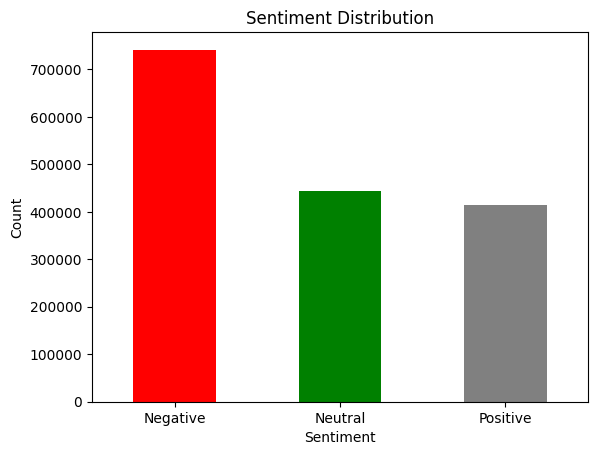

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')  # VADER lexicon for sentiment analysis

# Load dataset with a different encoding
file_path = '/content/drive/MyDrive/tw/training.1600000.processed.noemoticon.csv'  # Adjust the path as per your directory
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Rename columns for clarity
df.columns = ['tweet_id', 'user_id', 'timestamp', 'query', 'user_handle', 'tweet_text']

# Display the first few rows to verify the column renaming
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Create sentiment labels: Positive if compound score > 0.05, Negative if compound score < -0.05, Neutral if between -0.05 and 0.05
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['tweet_text'].apply(get_sentiment)

# Sentiment distribution
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Data Preprocessing: Tokenization, removing stopwords, and lemmatization using regex
def clean_text(text):
    # Use regular expressions to tokenize the text (alternative to word_tokenize)
    tokens = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply cleaning to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the cleaned tweets
print("\nCleaned Tweets (First 5):")
print(df['cleaned_text'].head())

# Separate features and target variable
X = df['cleaned_text']
y = df['sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions and evaluation
+
y_pred = model.predict(X_test_tfidf)

# Display accuracy and classification report
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'green', 'gray'], title='Sentiment Distribution')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load dataset
file_path = '/content/drive/MyDrive/tw/training.1600000.processed.noemoticon.csv'  # Adjust path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Rename columns
df.columns = ['tweet_id', 'user_id', 'timestamp', 'query', 'user_handle', 'tweet_text']

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling
df['sentiment'] = df['tweet_text'].apply(get_sentiment)

# Function for text preprocessing
def clean_text(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    # Tokenize
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply text cleaning
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment'])  # (negative=0, neutral=1, positive=2)

# Splitting data
X = df['cleaned_text']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Tokenization
max_words = 5000  # Vocabulary size
max_len = 100  # Sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate Model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nDeep Learning Model - LSTM Accuracy: {accuracy:.4f}")

# Plot Training Loss & Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/tw/training.1600000.processed.noemoticon.csv'